# Reproducibility Assessment of the Gridded dataset underpinning the Copernicus Interactive Climate Atlas

**Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.**
Production date: DD-MM-YYYY
Dataset version: 2.0.
Produced by: C3S2_521 contract.

## 🌍 Use case: tbd 

## ❓ Quality assessment question
* **Are the output indexes consistent between the Gridded Dataset Underpinning the Copernicus Interactive Climate Atlas and the CMIP6 Climate Projections dataset?**
* **etc**

Introduction:
The [Gridded dataset underpinning the Copernicus Interactive Climate Atlas](https://cds.climate.copernicus.eu/datasets/multi-origin-c3s-atlas) (Atlas dataset henceforth) provides the data for the [Copernicus Interactive Climate Atlas](https://atlas.climate.copernicus.eu/atlas) Application (Atlas application henceforth). The data is based on 12 origin datasets: 
- CMIP5
- CMIP6
- CORDEX-CORE
- CORDEX-EUR-11
- E-OBS
- ERA5
- ERA5-Land
- ORAS5
- CERRA
- Satellite sea surface temperature (SST-CCI)
- In-situ temperature (BERKEARTH)
- In-situ precipitation (CPC)
These datasets are processed from their origin for the Atlas applicationusing the following workflow 
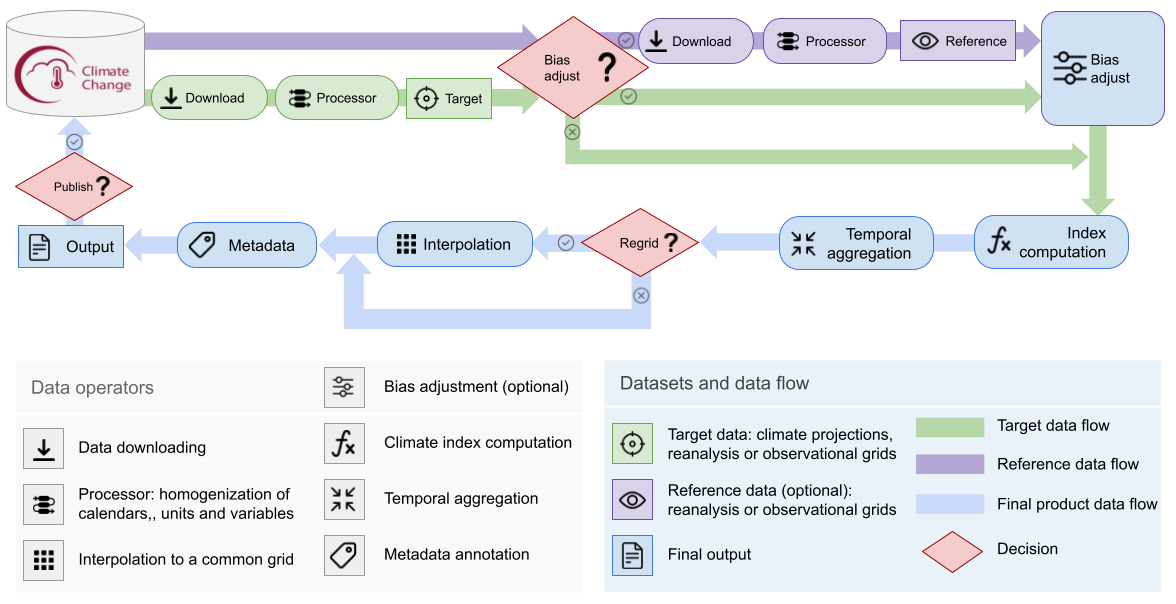




This box will be the introduction to the assessment, including:
- Purpose and aims of the assessment. 
- 

(NOTE: need to find the correct terminology when referring to the non-Atlas datasets throughout this, option: original origin datasets, non-Atlas datasets, ...  have chosen origin datasets)

The purpose of this assessment is to evaluate the consistency between the Gridded Dataset Underpinning the Copernicus Interactive Climate Atlas (Atlas dataset hereafter) and the origin datasets. This is done through 


## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Finding 1: will be a statement on the findings regarding the consistency 
* Finding 2
* Finding 3
* etc
```

## 📋 Methodology

To include:
- *Dimensions of the Atlas dataset and the rationale behind the scope of this assessment*
Due to the extend of the Atlas

- Justification for the assessment being performed (justification for the t.b.d metric chosen also)
- Methodology used, i.e. each step:
  
      - Download model data
  
      - Set parameters (variable, time, location)
  
      - Load data
  
      - Homogenisation to match Atlas dataset
  
      - Calculate the index
  
      - Interpolate to a common and regular grid
  
      - Download corresponding Atlas dataset data
  
      - Analyse results
          - plots 
          - similarity/comparison metric
          - results matrix 

Section 1 of this notebook is an in-depth look at the tx35 index from the CMIP6 dataset over Spain for the years 2060 and 2080 to demonstate the methodology of this reproducibility assessment and to prvoide a template 
The purpose of Part 1 is to explain to the users what is being done, demonstrate how they can do their own version of this study for their own region of interest and index, and provides a template for user's to create there own case studies from for their variable of interest. 
This Jupyter notebook is currently a test case to build the workflow. We have chosen to reproduce the [Monthly count of days with maximum near-surface air temperature above 35 deg](https://ecmwf-projects.github.io/c3s-atlas/notebooks/tx35.html) notebook as an initial test. 

Section 2 



**[](section-1)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-2)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-3)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-4)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.
 
**[](section-5)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-6)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-7)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-8)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-9)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

Any further notes on the method could go here (explanations, caveats or limitations).

## 📈 Analysis and results

(section-1)=
### Code setup 
```{note}
This notebook uses [earthkit](https://github.com/ecmwf/earthkit) for 
downloading ([earthkit-data](https://github.com/ecmwf/earthkit-data)) 
and visualising ([earthkit-plots](https://github.com/ecmwf/earthkit-plots)) data.
Because earthkit is in active development, some functionality may change after this notebook is published.
If any part of the code stops functioning, please raise an issue on our GitHub repository so it can be fixed.
```

#### Install the C3S Atlas User Tools
This notebook uses the [C3S Atlas User Tools](https://github.com/ecmwf-projects/c3s-atlas), which can be installed with the following cell. Further details and alternative options for installing this library are available in its [README file](https://github.com/ecmwf-projects/c3s-atlas?tab=readme-ov-file#requirements).



In [1]:
pip install git+https://github.com/ecmwf-projects/c3s-atlas.git

  Cloning https://github.com/ecmwf-projects/c3s-atlas.git to /tmp/pip-req-build-pv55s7aq
  Running command git clone --filter=blob:none --quiet https://github.com/ecmwf-projects/c3s-atlas.git /tmp/pip-req-build-pv55s7aq
  Resolved https://github.com/ecmwf-projects/c3s-atlas.git to commit 80256810cb81aa78ab53033479e08cff6a8add44
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


The following cell imports all the necessary packages.

In [2]:
# Imports

# For reading files
from pathlib import Path

# For accessing data in the Climate Data Store
import earthkit.data

# For calculating spatiotemporal aggregations
import earthkit.transforms

# For regridding and interpolations
import earthkit.regrid
from earthkit.regrid import interpolate

# For climate data handling
import numpy as np
import xarray as xr
import xclim

# For plotting 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# For standarsising the data (NR rewrite this)
from c3s_atlas.fixers import (
    apply_fixers
)

# For regridding 
import c3s_atlas.interpolation as xesmfCICA

from c3s_atlas.utils import (
    plot_month
)

# For calculating metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error

/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


(section-2)=
### Section 1: Case Study - tx35 variable Spain 2060, 2080 

This case study introduces the methodology by focusing on the tx35 variable (monthly count of days with maximum temperature above 35 °C) for Spain under future climate scenarios. The years 2060 and 2080 are chosen to illustrate two contrasting situations: one where differences between datasets are clearly visible (2060) and another where they converge (2080). This provides a clear example of the analysis steps and serves as a template for exploring other variables, regions, and time periods.

(section-3)=
### 1.1 Download Climate Data

#### General setup
This notebook uses [<u>earthkit-data<u>](https://github.com/ecmwf/earthkit-data) to download files from the CDS. If you intend to run this notebook multiple times, it is highly recommended that you [<u>enable caching<u>](https://earthkit-data.readthedocs.io/en/latest/guide/caching.html) to prevent having to download the same files multiple times.


*(note: section 2 will be functions if they are neccessary)*
The following cell uses [earthkit](https://earthkit-data.readthedocs.io/en/latest/index.html) to download the data from the origin dataset.

In [3]:
#note to NR be unconnected from NPL wifi and VPN to run this cell 
# Use earthkit to download some data (Decided to unpack the dictionary as this is how it is in official docs)

# Define request
CMIP6_ID = "projections-cmip6"
request_CMIP6_tx35 = {
    "temporal_resolution": "daily",
    "experiment": "ssp5_8_5",
    "variable": "daily_maximum_near_surface_air_temperature",
    "model": "cmcc_esm2",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "format": "netcdf"
}


We define a helper function that adds the parameters that are consistent for both .... , to a number of requests.

In [4]:

def make_full_request(request_dataset: dict, *requests: dict) -> dict:
    """ 
    Combine default requests (temporal resolution, experiment, variable, model, format) with a year-specific request (request_year_20xx).
    """
    base_request = request_dataset
    updated_requests = [base_request | req for req in requests]
    return updated_requests


We know define the paramters unique to the data we need. For this example case we will be investigating 2060 and 2080 so we define the requests for these.

In [5]:

request_year_2060 = {"year": ["2060"]}
request_year_2080 = {"year": ["2080"]}


In [6]:

requests_CMIP6_combined = make_full_request(request_CMIP6_tx35, request_year_2060, request_year_2080)

# Download data
ds_CMIP6 = earthkit.data.from_source("cds", CMIP6_ID, *requests_CMIP6_combined)


2025-09-19 14:05:43,945 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-19 14:05:43,947 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
100%|█████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 69.68it/s]
Unknown file type, no reader available. path=/tmp/earthkit-data-nr2/file-4070083748ea7e50fa09710f39df3233301612360ca7ea1267765bb09e7e31ce.d/provenance.png magic=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\n\xd3\x00\x00\x03"\x08\x02\x00\x00\x00\x99\xec9+\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddw' content_type=None
Unknown file type, no reader available. path=/tmp/earthkit-data-nr2/file-7ad4268f78167fe51d560b185c67fd9f38e70d20af99e12803b90c9997a1d2fa.d/provenance.png magic=b'\x89P

(section-4)=
### 1.2 Load the data
Earthkit-data downloads the dataset as a field list, which can be manipulated directly. Here, we convert it to an [Xarray](https://docs.xarray.dev/en/stable/) object for ease of use later (when comparing multiple datasets):


In [7]:

print("CMIP6 data type from earthkit-data:", type(ds_CMIP6))
data_CMIP6 = ds_CMIP6.to_xarray(compat="equals")
print("CMIP6 data type in Xarray:", type(data_CMIP6))
data_CMIP6


CMIP6 data type from earthkit-data: <class 'earthkit.data.readers.netcdf.fieldlist.NetCDFMultiFieldList'>
CMIP6 data type in Xarray: <class 'xarray.core.dataset.Dataset'>


/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/earthkit/data/readers/netcdf/fieldlist.py:202: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  return xr.open_mfdataset(


<xarray.Dataset> Size: 167MB
Dimensions:    (time: 730, bnds: 2, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 6kB 2060-01-01 12:00:00 ... 2080-12-31 12:00:00
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    height     float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 12kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 2MB dask.array<chunksize=(365, 192, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 3MB dask.array<chunksize=(365, 288, 2), meta=np.ndarray>
    tasmax     (time, lat, lon) float32 161MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            tasmax
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/a1513d6f-5325-4b99-bbe6-9b096557b100

(section-5)=
### 1.3 Homogenisation 
All the origin datasets need to be homogenised after being downloaded from the CDS, this is done using the [c3s_atlas apply](https://github.com/ecmwf-projects/c3s-atlas/tree/main/c3s_atlas)_fixers function.


- The metadata of the spatial coordinates is homogenised to use standard names, in particular [lon, lat].

- Fix any non-standard calendars used in the data. This typically involves converting the calendars to the CF standard calendar (Mixed Gregorian/Julian) commonly used in climate data.

- Convert the units of the data to a common format (e.g. Celsius for temperature). This prevents us from working with the same variables in different units, for example.

- Convert the longitude values from the [0, 360] format to the [-180, 180] one. This is done to ensure that the longitude variable is common between the different datasets.

- Aggregated to the required temporal resolution. For example, hourly datasets (such as ERA5, ERA5-Land, WFDE5, etc.) will be resampled to daily resolution. This involves using a temporal aggregation method, such as taking the maximum or minimum value for a given variable. As part of this last step, some variable transformations are necessarily applied. For instance, fluxes variables in ERA5 are accumulated, and therefore, the last hour of the day represent daily accumulations. To mention another case, the surface wind is computed as a combination of both the u- and v-components.

In the below cell we specifiy 

In [8]:
# Homogenisation code 
data_CMIP6_2060 = data_CMIP6.where(data_CMIP6["time"].dt.year == 2060, drop=True) # must do this here or the harmonisation aggregates to monthly 
data_CMIP6_2080 = data_CMIP6.where(data_CMIP6["time"].dt.year == 2060, drop=True)

project_id = "cmip6"
variable = 'tasmax'
var_mapping = {
            "dataset_variable": {"tasmax": "data"},
            "aggregation": {"data": "mean"},
        }
data_CMIP6_2060 = apply_fixers(data_CMIP6_2060, variable, project_id, var_mapping)
data_CMIP6_2080 = apply_fixers(data_CMIP6_2080, variable, project_id, var_mapping)

2025-09-19 14:05:45,022 — Homogenization-fixers — INFO — Dataset has already the correct names for its coordinates
2025-09-19 14:05:45,032 — Homogenization-fixers — INFO — Fixing calendar for <xarray.Dataset> Size: 84MB
Dimensions:    (time: 365, bnds: 2, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 3kB 2060-01-01 12:00:00 ... 2060-12-31 12:00:00
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    height     float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 1MB dask.array<chunksize=(365, 192, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 2MB dask.array<chunksize=(365, 288, 2), meta=np.ndarray>
    tasmax     (time, lat, lon) float32 81MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes: 

(section-6)= 
### 1.4 Calculate index (tx35) and aggregate to monthly (MS) temporal resolution using xclim

[xclim](https://xclim.readthedocs.io/en/stable/) is an operational Python library for climate services, providing a framework for constructing custom climate indicators and indices.

In [9]:
# code to calculate tx35 and change temporal resolution 
da_tx35_2060 = xclim.indices.tx_days_above(data_CMIP6_2060['tasmax'], thresh='35.0 degC', 
                                      freq='MS', op='>')
da_tx35_2080 = xclim.indices.tx_days_above(data_CMIP6_2080['tasmax'], thresh='35.0 degC', 
                                      freq='MS', op='>')

# Convert DataArray to Dataset with specified variable name
ds_tx35_2060 = da_tx35_2060.to_dataset(name='tx35')
ds_tx35_2080 = da_tx35_2080.to_dataset(name='tx35')



(section-7)= 
### 1.5 Interpolation to a common and regular grid
```{note}
This notebook uses [xESMF](https://github.com/pangeo-data/xESMF) for regridding data.
xESMF is most easily installed using conda as explained in its documentation.
Users who cannot or do not wish to use conda will have to manually compile and install [ESMF](https://earthsystemmodeling.org/docs/release/latest/ESMF_usrdoc/node10.html) on their machines, which is not trivial.
In future, this notebook will use [earthkit-regrid](https://github.com/ecmwf/earthkit-regrid) instead, once it reaches suitable maturity.
```

Interpolation to a common and regular grid using 

In [10]:

# interpolate data original order
int_attr = {'interpolation_method' : 'conservative_normed', 
            'lats' : np.arange(-89.5, 90.5, 1),
            'lons' : np.arange(-179.5, 180.5, 1),
            'var_name' : 'tx35'
}

INTER = xesmfCICA.Interpolator(int_attr)

ds_tx35_2060_i = INTER(ds_tx35_2060)
ds_tx35_2080_i = INTER(ds_tx35_2080)


/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')
/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


(section-7)= 
### 1.6 Download the data from the Atlas dataset

In this section, the dataset produced above is downloaded from the [Gridded dataset underpinning the Copernicus Interactive Climate Atlas](https://cds.climate.copernicus.eu/datasets/multi-origin-c3s-atlas?tab=overview) using [earthkit](https://earthkit.readthedocs.io/en/latest/). The results of both of the datasets are compared to determine reproducibility.

In [11]:
# Use earthkit to download the Atlas dataset

# Define request
dataset = "multi-origin-c3s-atlas"
request = {
    "origin": "cmip6",
    "experiment": "ssp5_8_5",
    "period": "2015-2100",
    "variable": "monthly_extreme_hot_days",
    "bias_adjustment": "no_bias_adjustment"
}

# Download data
ds_C3S_Atlas = earthkit.data.from_source("cds", dataset, request)

2025-09-19 14:06:05,293 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-19 14:06:05,294 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
Unknown file type, no reader available. path=/tmp/earthkit-data-nr2/cds-5ba5ca838418756172cfe1e8f80c95a0dd6278bdd897540dd45600415af5ce43.d/provenance.png magic=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x08\xf5\x00\x00\x03\x10\x08\x02\x00\x00\x00\xcaqU\xdb\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddw' content_type=None
/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tx35' has multiple fill values {np.float32(1.0384594e+34), np.float32(-1.7014118e+38)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


In [12]:
# load data with xarray 
ds_tx35_C3S_Atlas = xr.open_dataset(ds_C3S_Atlas)
ds_tx35_C3S_Atlas

/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tx35' has multiple fill values {np.float32(1.0384594e+34), np.float32(-1.7014118e+38)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 5GB
Dimensions:          (lat: 180, bnds: 2, lon: 360, time: 1032, member: 20)
Coordinates:
  * lat              (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon              (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * time             (time) datetime64[ns] 8kB 2015-01-01 ... 2100-12-01
    member_id        (member) <U45 4kB ...
    gcm_institution  (member) <U19 2kB ...
    gcm_model        (member) <U16 1kB ...
    gcm_variant      (member) <U8 640B ...
    threshold35c     float64 8B ...
    height2m         float64 8B ...
Dimensions without coordinates: bnds, member
Data variables:
    lat_bnds         (lat, bnds) float64 3kB ...
    lon_bnds         (lon, bnds) float64 6kB ...
    time_bnds        (time, bnds) datetime64[ns] 17kB ...
    tx35             (member, time, lat, lon) float32 5GB ...
    crs              int32 4B ...
Attributes: (12/26)
    Conventions:                CF-1.9 ACDD-1.3
    title:                      Copernicus Interactive Climate Atlas: gridded...
    summary:                    Monthly/annual gridded data from observations...
    institution:                Copernicus Climate Change Service (C3S)
    producers:                  Institute of Physics of Cantabria (IFCA, CSIC...
    license:                    CC-BY 4.0, https://creativecommons.org/licens...
    ...                         ...
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lon_resolution:  1.0
    geospatial_lon_units:       degrees_east
    date_created:               2024-12-05 16:37:49.749769+01:00
    tracking_id:                1a7a60e7-7787-48b5-b18f-a7bf7b4de4be

In [13]:
# define the same dataset
# select a specific member of the ensemble
select_member = [
    str(mem.data) for mem in ds_tx35_C3S_Atlas.member_id if "cmcc-esm2" in str(mem.data).lower()
][0]
print(select_member)

ds_tx35_C3S_Atlas_2060 = ds_tx35_C3S_Atlas.sel(
    member = np.where(ds_tx35_C3S_Atlas.member_id == select_member)[0], 
    time = "2060"
)

ds_tx35_C3S_Atlas_2080 = ds_tx35_C3S_Atlas.sel(
    member = np.where(ds_tx35_C3S_Atlas.member_id == select_member)[0], 
    time = "2080"
)

CMCC_CMCC-ESM2_r1i1p1f1


(section-8)=
### 1.7 Compare the results 

#### Results Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included). 

If this is the **results section**, we expect the final plots to be created here with a description of how to interpret them, and what information can be extracted for the specific use case and user question. The information in the 'quality assessment statement' should be derived here. 

In [18]:
import earthkit.plots as ekp  #make all plots with earthkit 
zoomin_extent = [-9.5, 3.5, 35.5, 44.5]
lat_bounds = (35.5, 44.5)
lon_bounds = (-9.5, 3.5)
proj = ccrs.PlateCarree()

Results comparison for 2080 

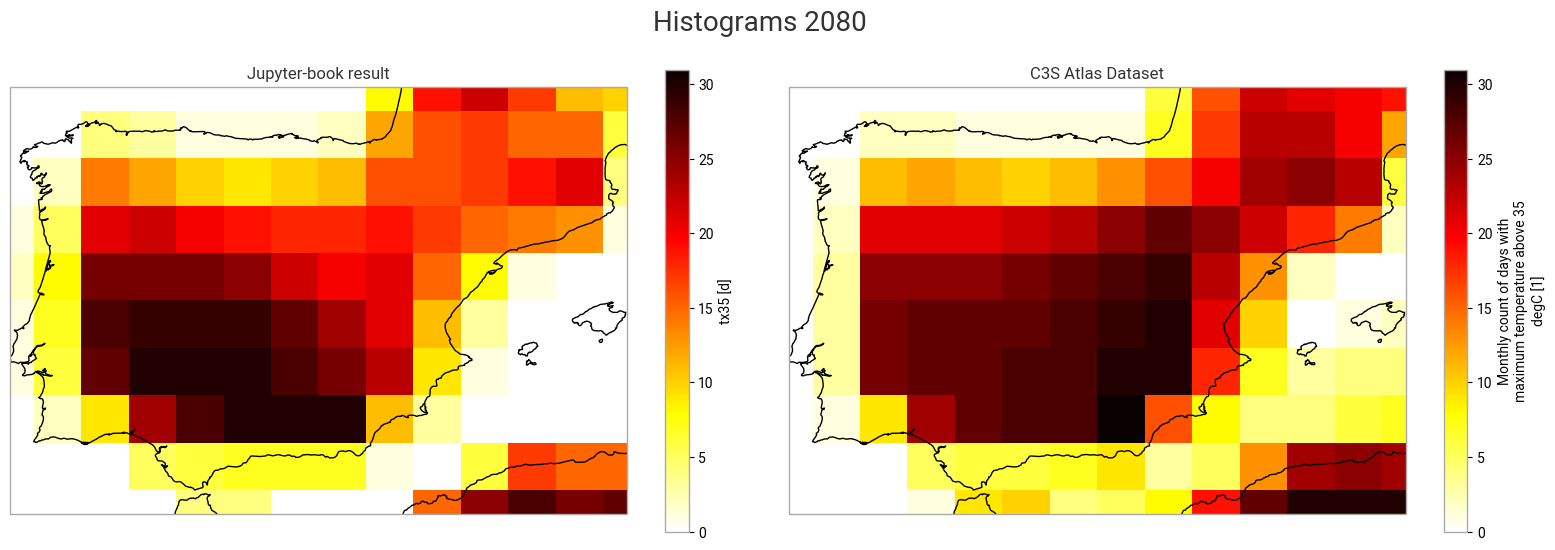

In [39]:

fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj}, figsize=(20, 6))

# user-tools
plot_month(ax[0], ds_tx35_2080_i, 'tx35', 8, 'Jupyter-book result', 'hot_r')
ax[0].set_extent(zoomin_extent)

# workflow (intermediate dataset)
plot_month(ax[1], ds_tx35_C3S_Atlas_2080, 'tx35', 8, 'C3S Atlas Dataset', 'hot_r')
ax[1].set_extent(zoomin_extent)
plt.subplots_adjust(wspace=0.01, hspace=0.1) 
fig.suptitle("Histograms 2080", fontsize = 20)


atlas = ds_tx35_2080_i['tx35']  #DataArray
jn = ds_tx35_C3S_Atlas_2080['tx35']  #DataArray



(section-9)=
### Section 2: Multiple datasets comparison of Monthly Maximum of Daily Maximum Temperature (txx)

datasets: CMIP5, CMIP6, CORDEX-CORE, CORDEX-EUR-11, E-OBS, ERA5, ERA5-Land, CERRA, and In-situ temperature (BERKEARTH).

## ℹ️ If you want to know more

### Key resources

List some key resources related to this assessment. E.g. CDS entries, applications, dataset documentation, external pages.
Also list any code libraries used (if applicable).

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

List the references used in the Notebook here.

E.g.

[[1]](https://doi.org/10.1038/s41598-018-20628-2) Rodriguez, D., De Voil, P., Hudson, D., Brown, J. N., Hayman, P., Marrou, H., & Meinke, H. (2018). Predicting optimum crop designs using crop models and seasonal climate forecasts. Scientific reports, 8(1), 2231.

In [ ]:
#PRECIPITATION 
#Index selected is rx1day: Monthly maximum of 1-day accumulated precipitation

# define request
CMIP6_ID = "projections-cmip6"
request_CMIP6_rx1day = {
    "temporal_resolution": "daily",
    "experiment": "ssp5_8_5",
    "variable": "precipitation",
    "model": "cmcc_esm2",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "year": ["2070"],
    "format": "netcdf"
}

ds_CMIP6 = earthkit.data.from_source("cds", CMIP6_ID, request_CMIP6_rx1day)

print("CMIP6 data type from earthkit-data:", type(ds_CMIP6))
data_CMIP6 = ds_CMIP6.to_xarray(compat="equals")
print("CMIP6 data type in Xarray:", type(data_CMIP6))
print(data_CMIP6)


# this code is changing the units from precip flux as expected by xclim (kg m-2 s-1) to 
# mm and hence breaking on the xclim function as it gets an unexpected unit
# unit_converter from c3s_atlas units.py is what is causing this change 
# Homogenisation code 
project_id = "CMIP6"
variable = 'pr'
var_mapping = {
            "dataset_variable": {"pr": "data"},
            "aggregation": {"data": "mean"},
        }
data_CMIP6 = apply_fixers(data_CMIP6, variable, project_id, var_mapping)
data_CMIP6

# Index First 
# calculate the index 
da_rx1day = xclim.indicators.atmos.max_n_day_precipitation_amount(data_CMIP6['pr'], window=1, freq='MS')

# Convert DataArray to Dataset with specified variable name
ds_rx1day = da_rx1day.to_dataset(name='rx1day')
print(ds_rx1day)


# interpolate data
int_attr = {'interpolation_method' : 'conservative_normed', 
            'lats' : np.arange(-89.5, 90.5, 1),
            'lons' : np.arange(-179.5, 180.5, 1),
            'var_name' : 'rx1day'
}

INTER = xesmfCICA.Interpolator(int_attr)
ds_rx1day_i = INTER(ds_rx1day)  # index first
# Original Order End 

# # New Order Start 
# # Step 1: Wrap tasmax in a Dataset
# new_tasmax_ds = xr.Dataset({'tasmax': data_CMIP6['tasmax']})

# # Step 2: Set up interpolation attributes
# new_int_attr = {
#     'interpolation_method': 'conservative_normed',
#     'lats': np.arange(-89.5, 90.5, 1),
#     'lons': np.arange(-179.5, 180.5, 1),
#     'var_name': 'tasmax'
# }

# new_INTER = xesmfCICA.Interpolator(new_int_attr)

# # Step 3: Interpolate the tasmax dataset
# new_tasmax_interp_ds = new_INTER(new_tasmax_ds)

# # Step 4: Calculate tx35 index on interpolated tasmax
# new_da_tx35 = xclim.indices.tx_days_above(new_tasmax_interp_ds['tasmax'], 
#     thresh= threshold,
#     freq='MS' # Monthly frequency
# )

# # # Step 5: Convert to Dataset
# new_ds_tx35_i = new_da_tx35.to_dataset(name='tx35')
# # New order end 


# atlas = ds_tx35_i['tx35']  #DataArray
# atlas_new = new_ds_tx35_i['tx35']

# lat_bounds = (-90, 90)
# lon_bounds = (-180, 180)

# atlas_subset = atlas.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
# new_atlas_subset = atlas_new.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# # Align time - maybe use xr.align
# common_time = np.intersect1d(atlas_subset['time'], new_atlas_subset['time'])
# atlas_subset = atlas_subset.sel(time=common_time)
# new_atlas_subset = new_atlas_subset.sel(time=common_time)

# atlas_flat = atlas_subset.values.flatten()
# new_atlas_flat = new_atlas_subset.values.flatten()

# # mask out NaNs
# mask = ~np.isnan(atlas_flat) & ~np.isnan(new_atlas_flat) 
# atlas_clean = atlas_flat[mask]
# new_atlas_clean = new_atlas_flat[mask]


# # Plot results ORIGINAL 

# #zoomin_extent = [-9.5, 3.5, 35.5, 44.5] # Spain
# zoomin_extent = [60, -12, 65, 35]   # Europe lon_min lon_max north south
# month = 8 

# proj = ccrs.PlateCarree()
# fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj}, figsize=(20, 6))

# # from atlas use tools
# plot_month(ax[0], ds_tx35_i, 'tx35', month, f'Index First {threshold}', 'hot_r')
# ax[0].set_extent(zoomin_extent)

# # workflow (intermediate dataset)
# plot_month(ax[1], new_ds_tx35_i, 'tx35', month, f'Regrid First {threshold}', 'hot_r')
# ax[1].set_extent(zoomin_extent)
# plt.subplots_adjust(wspace=0.01, hspace=0.1) 


# diff = ds_tx35_i - new_ds_tx35_i
# fig, ax = plt.subplots(figsize=(20, 6), subplot_kw = {'projection': proj})
# plot_month(ax, diff, 'tx35', month, f'Diff {threshold}', 'PiYG')

# ax.set_extent(zoomin_extent)

# plt.show()
# plt.close()

# # Histogram
# fig, ax = plt.subplots(figsize=(5, 5), layout="constrained")
# import numpy as np
# ax.hist(diff.sel(time=f"2080-{month:02d}-01")["tx35"].values.ravel(), bins=np.arange(-31, 32, 1), log = True)
# ax.set_xlabel("Difference")
# plt.show()
# plt.close()